In [3]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Load dat
df = pd.read_csv('imdb_master.csv', engine = 'python')
df.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


let s clean the data to have only what we need : review columns and and the label column

In [4]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 0','type','file'], axis = 1)
df.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,neg
1,This is an example of why the majority of acti...,neg
2,"First of all I hate those moronic rappers, who...",neg
3,Not even the Beatles could write songs everyon...,neg
4,Brass pictures (movies is not a fitting word f...,neg


In [5]:
# check if there is missing data
df.isnull().sum()

review    0
label     0
dtype: int64

In [6]:
# see how the label class are distributed
df.label.value_counts()

unsup    50000
pos      25000
neg      25000
Name: label, dtype: int64

In [7]:
# drop unsup column, we need only pos and neg for our example 
df = df[df.label != 'unsup']
df.label.value_counts()

pos    25000
neg    25000
Name: label, dtype: int64

In [8]:
# map the label class to 0 and 1
df.label = df.label.map({'pos':1,'neg': 0})
df.head()

,review,label
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [9]:
# shape of df
df.shape

(50000, 2)

Our data has 50000 reviews labeled as negative or positive, Now after cleaning it, we are ready to split it into train and test to feed it to the model.

In [10]:
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(df['review'], 
                                                    df['label'], 
                                                    random_state=1)


Before we jump to the next step we need to know the Bag of Words(BoW) concept which is a term used to specify the problems that have a 'bag of words' or a collection of text data that needs to be worked with. The basic idea of BoW is to take a piece of text and count the frequency of the words in that text. It is important to note that the BoW concept treats each word individually and the order in which the words occur does not matter.
Using a process which we will go through now, we can convert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document.

For example:

Lets say we have 4 documents as follows:
['Hello, how are you!',
'Win money, win from home.',
'Call me now',
'Hello, Call you tomorrow?']

Our objective here is to convert this set of text to a frequency distribution matrix, as follows:

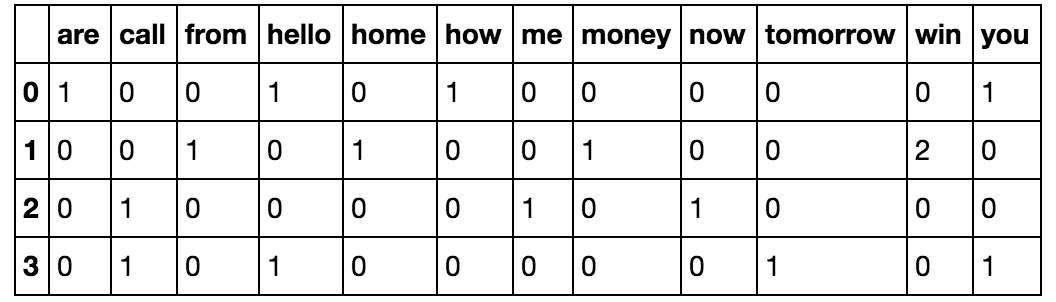

To handle this, we will be using sklearns count vectorizer method which does the following:

It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
It counts the occurrence of each of those tokens.
** Please Note: **

The CountVectorizer method automatically converts all tokenized words to their lower case form so that it does not treat words like 'He' and 'he' differently. It does this using the lowercase parameter which is by default set to True.

It also ignores all punctuation so that words followed by a punctuation mark (for example: 'hello!') are not treated differently than the same words not prefixed or suffixed by a punctuation mark (for example: 'hello'). It does this using the token_pattern parameter which has a default regular expression which selects tokens of 2 or more alphanumeric characters.

The third parameter to take note of is the stop_words parameter. Stop words refer to the most commonly used words in a language. They include words like 'am', 'an', 'and', 'the' etc. By setting this parameter value to english, CountVectorizer will automatically ignore all words(from our input text) that are found in the built in list of english stop words in scikit-learn. This is extremely helpful as stop words can skew our calculations when we are trying to find certain key words.

In [12]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer(stop_words = 'english')

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [14]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)
predictions = naive_bayes.predict(testing_data)

print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.85776
Precision score:  0.8712468193384224
Recall score:  0.8344435418359057
F1 score:  0.8524481327800829
